In [1]:
import pandas as pd
import os
import shutil

In [6]:
train_path = '/Users/michelangelozampieri/Desktop/TAMID-Group-New/data/Detector_Images/train/_annotations.csv'
test_path = '/Users/michelangelozampieri/Desktop/TAMID-Group-New/data/Detector_Images/test/_annotations.csv'
valid_path = '/Users/michelangelozampieri/Desktop/TAMID-Group-New/data/Detector_Images/valid/_annotations.csv'

In [7]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_valid = pd.read_csv(valid_path)
df_train.head()

filename  width  height    class  \
0  PS-764_jpg.rf.32771230a804fcfbe391fc7d2a1313f9...    640     640  Plastic   
1  OTHERS-1755_jpg.rf.327e42b2da0840abc6e187ba8e9...    640     640  Plastic   
2  OTHERS-594_jpg.rf.328078a04fc994c041f12ca28a33...    640     640  Plastic   
3  PP-18_jpg.rf.3289ea6a071e3d760155f1d018b56792.jpg    640     640  Plastic   
4  PP-503_jpg.rf.32e5563decc62308eb4771dc951b073b...    640     640  Plastic   

   xmin  ymin  xmax  ymax  
0   155   150   523   515  
1   104   120   404   495  
2   168    36   553   546  
3    50   130   560   538  
4   230    56   475   396

In [10]:
# Define the paths for the new CSV files
updated_train_path = '/Users/michelangelozampieri/Desktop/TAMID-Group-New/data/Detector_Images/train/updated_annotations.csv'
updated_test_path = '/Users/michelangelozampieri/Desktop/TAMID-Group-New/data/Detector_Images/test/updated_annotations.csv'
updated_valid_path = '/Users/michelangelozampieri/Desktop/TAMID-Group-New/data/Detector_Images/valid/updated_annotations.csv'

In [11]:
df_list = [df_train, df_test, df_valid]

for df in df_list:
    # Extract label from filename (before the first '-')
    df['label'] = df['filename'].str.extract(r'^([^-\s]+)-')

    # Replace the 'class' column with this new label
    df['class'] = df['label']

    # Generate new filenames as <class>-<index>.jpg
    df['new_filename'] = df['label'] + '-' + df.index.astype(str) + '.jpg'

    # Drop the temporary 'label' column if not needed
    df = df.drop(columns=['label'])

    # Save the modified DataFrame back to the CSV file
    if df is df_train:
        df.to_csv(updated_train_path, index=False)
    elif df is df_test:
        df.to_csv(updated_test_path, index=False)
    else:
        df.to_csv(updated_valid_path, index=False)


In [ ]:
train_dir = './data/Detector_Images/train'
test_dir = './data/Detector_Images/test'
valid_dir = './data/Detector_Images/valid'

In [12]:
for df, path in zip(df_list, [updated_train_path, updated_test_path, updated_valid_path]):
    # Remove rows where 'label' is null
    df = df[df['label'].notnull()]
    # Save the updated DataFrame back to the CSV
    df.to_csv(path, index=False)
    print(f"Updated annotations saved to: {path}")

Updated annotations saved to: /Users/michelangelozampieri/Desktop/TAMID-Group-New/data/Detector_Images/train/updated_annotations.csv
Updated annotations saved to: /Users/michelangelozampieri/Desktop/TAMID-Group-New/data/Detector_Images/test/updated_annotations.csv
Updated annotations saved to: /Users/michelangelozampieri/Desktop/TAMID-Group-New/data/Detector_Images/valid/updated_annotations.csv


In [14]:
unique_labels = set()
for df in df_list:
    unique_labels.update(df['label'].unique())
print(f"Unique labels found: {unique_labels}")

# remove any entries that have "Mesa" in it 
for df in df_list:
    df = df[~df['label'].str.contains("Mesa", na=False)]
    # Save the updated DataFrame back to the CSV
    if df is df_train:
        df.to_csv(updated_train_path, index=False)
    elif df is df_test:
        df.to_csv(updated_test_path, index=False)
    else:
        df.to_csv(updated_valid_path, index=False)

for i, df in enumerate(df_list):
    df_list[i] = df[~df['label'].str.contains("Mesa", na=False)]
    # Save the updated DataFrame back to the CSV
    if df is df_train:
        df_list[i].to_csv(updated_train_path, index=False)
    elif df is df_test:
        df_list[i].to_csv(updated_test_path, index=False)
    else:
        df_list[i].to_csv(updated_valid_path, index=False)

Unique labels found: {'277Mesa', '11Mesa', '171Mesa', '243Mesa', '47Mesa', '49Mesa', '16Mesa', '258Mesa', '275Mesa', '247Mesa', '29Mesa', 'PET', '69Mesa', '270Mesa', '24Mesa', '290Mesa', '19Mesa', '251Mesa', '30Mesa', '159Mesa', '279Mesa', '260Mesa', '268Mesa', '289Mesa', '178Mesa', '236Mesa', '177Mesa', '235Mesa', '162Mesa', '284Mesa', '158Mesa', '46Mesa', '239Mesa', 'LDPE', '180Mesa', '160Mesa', '253Mesa', '263Mesa', '12Mesa', '34Mesa', '293Mesa', 'PS', '39Mesa', '7Mesa', '274Mesa', 'OTHERS', '14Mesa', '288Mesa', '249Mesa', '244Mesa', '63Mesa', '286Mesa', '27Mesa', '265Mesa', '54Mesa', '238Mesa', '245Mesa', '252Mesa', '43Mesa', '255Mesa', '8Mesa', '28Mesa', '259Mesa', '21Mesa', '20Mesa', '1Mesa', '62Mesa', '282Mesa', '4Mesa', '294Mesa', '44Mesa', '164Mesa', '172Mesa', '165Mesa', '278Mesa', '31Mesa', '55Mesa', '170Mesa', '283Mesa', '241Mesa', '257Mesa', '246Mesa', '61Mesa', '285Mesa', '38Mesa', '271Mesa', '2Mesa', '59Mesa', 'HDPE', '26Mesa', '168Mesa', '242Mesa', '37Mesa', '57Mesa', '

In [15]:
unique_labels_after = set()
for df in df_list:
    unique_labels_after.update(df['label'].unique())
print(f"Unique labels found: {unique_labels_after}")

Unique labels found: {'LDPE', 'PET', nan, 'PS', 'PP', 'OTHERS', 'HDPE'}


In [18]:
# Remove any entries that have "nan" or are null in the label column
for df in df_list:
    df = df[~df['label'].isnull()]
    # Save the updated DataFrame back to the CSV
    if df is df_train:
        df.to_csv(updated_train_path, index=False)
    elif df is df_test:
        df.to_csv(updated_test_path, index=False)
    else:
        df.to_csv(updated_valid_path, index=False)

In [39]:
unique_labels_last = set()
for df in df_list:
    unique_labels_last.update(df['label'].unique())
print(f"Unique labels found: {unique_labels_last}")

Unique labels found: {'LDPE', 'PET', nan, 'PS', 'PP', 'OTHERS', 'HDPE'}


In [40]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as T
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [41]:
class_map = {
    "LDPE": 0,
    "PET" : 1,
    "PS" : 2,
    "PP" : 3,
    "OTHERS" : 4,
    "HDPE" : 5,
}

In [42]:
class ObjectDetectionDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transforms=None):
        self.df = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transforms = transforms if transforms else T.ToTensor()

        # Group by filename
        self.image_data = self.df.groupby('filename')
        self.image_files = list(self.image_data.groups.keys())

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        group = self.image_data.get_group(img_name)
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert("RGB")

        boxes = []
        labels = []

        for _, row in group.iterrows():
            boxes.append([row['xmin'], row['ymin'], row['xmax'], row['ymax']])
            labels.append(class_map[row['label']])

        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        target = {
            "boxes": boxes,
            "labels": labels
        }

        image = self.transforms(image)

        return image, target

In [43]:
def get_model(num_classes):
    model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

In [46]:
def collate_fn(batch):
    return tuple(zip(*batch))


def train_one_epoch(model, data_loader, optimizer, device):
    model.train()
    for images, targets in data_loader:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        print(f"Loss: {losses.item():.4f}")

In [49]:
if __name__ == "__main__":
    annotations_file = updated_train_path
    img_dir = "/Users/michelangelozampieri/Desktop/TAMID-Group-New/data/Detector_Images/train"
    
    dataset = ObjectDetectionDataset(annotations_file, img_dir)
    dataset.image_files = [f for f in dataset.image_files if f.endswith('.jpg')]
    num_classes = 7  # 6 classes + 1 background
    data_loader = DataLoader(dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = get_model(num_classes).to(device)

    optimizer = torch.optim.SGD(
        [p for p in model.parameters() if p.requires_grad],
        lr=0.005, momentum=0.9, weight_decay=0.0005
    )

    num_epochs = 3
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        train_one_epoch(model, data_loader, optimizer, device)

    torch.save(model.state_dict(), "fasterrcnn_custom.pth")
    print("Model saved to fasterrcnn_custom.pth")

/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/3
Loss: 1.8270
Loss: 1.7457
Loss: 2.1524
Loss: 1.0981
Loss: 1.2516
Loss: 1.8641
Loss: 3.0182
Loss: 1.4666
Loss: 1.2204
Loss: 1.4190
Loss: 1.5652
Loss: 0.9301
Loss: 1.6361
Loss: 1.4700
Loss: 2.5889
Loss: 1.3385
Loss: 1.8261
Loss: 2.4516
Loss: 2.3002
Loss: 0.3506
Loss: 1.3358
Loss: 0.6418
Loss: 0.8797
Loss: 0.4379
Loss: 0.4706
Loss: 1.1542
Loss: 0.4569
Loss: 0.7924
Loss: 0.3277
Loss: 1.1091
Loss: 0.6091
Loss: 0.5884
Loss: 0.6408
Loss: 1.0508
Loss: 0.8850
Loss: 0.3652
Loss: 0.4944
Loss: 1.2696
Loss: 0.5384
Loss: 0.6695
Loss: 0.4388
Loss: 0.8958
Loss: 0.7084
Loss: 1.1391
Loss: 0.5718
Loss: 0.6518
Loss: 0.7704
Loss: 1.0014
Loss: 0.7923
Loss: 0.8666
Loss: 0.6293
Loss: 1.7464
Loss: 1.6129
Loss: 0.7671
Loss: 0.6138
Loss: 2.9950
Loss: 0.6343
Loss: 1.0325
Loss: 0.6047
Loss: 0.5822
Loss: 0.5120
Loss: 0.8176
Loss: 0.4478
Loss: 0.8475
Loss: 0.2908
Loss: 0.3006
Loss: 0.7671
Loss: 1.3975
Loss: 1.2266
Loss: 2.0549
Loss: 2.0103
Loss: 0.4871
Loss: 0.9203
Loss: 1.2156
Loss: 0.4501
Loss: 1.0705
Lo

In [55]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_predictions(image, targets, outputs, class_map):
    # Reverse the class_map to get class names from indices
    idx_to_class = {v: k for k, v in class_map.items()}

    # Convert tensors to numpy arrays
    boxes = outputs['boxes'].cpu().numpy()
    labels = outputs['labels'].cpu().numpy()
    scores = outputs['scores'].cpu().numpy()

    true_boxes = targets['boxes'].cpu().numpy()
    true_labels = targets['labels'].cpu().numpy()

    # Plot the image
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image.permute(1, 2, 0).cpu().numpy())

    # Plot predicted boxes
    for box, label, score in zip(boxes, labels, scores):
        xmin, ymin, xmax, ymax = box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin - 5, f"{idx_to_class[label]}: {score:.2f}", color='r', fontsize=10, backgroundcolor='white')

    # Plot true boxes
    for box, label in zip(true_boxes, true_labels):
        xmin, ymin, xmax, ymax = box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='g', facecolor='none', linestyle='dashed')
        ax.add_patch(rect)
        ax.text(xmin, ymax + 5, f"True: {idx_to_class[label]}", color='g', fontsize=10, backgroundcolor='white')

    plt.axis('off')
    plt.show()

def evaluate_model(model, data_loader, device):
    model.eval()
    with torch.no_grad():
        for images, targets in data_loader:
            images = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            outputs = model(images)
            # Visualize the first image in the batch
            visualize_predictions(images[0], targets[0], outputs[0], class_map)
            break

/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/var/folders/d0/7dy3yx5n4v77cs4x81jpwwcc0000gn/T/ipykernel_30835/2268271440.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpic

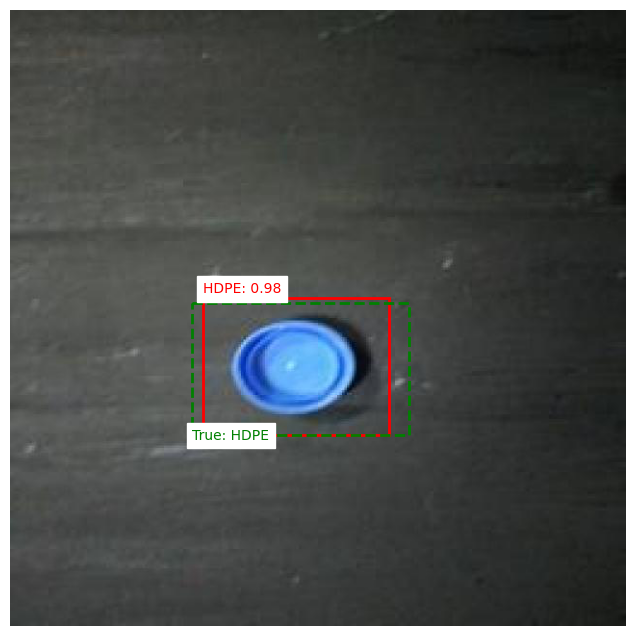

In [56]:
annotations_file = updated_test_path
img_dir = "/Users/michelangelozampieri/Desktop/TAMID-Group-New/data/Detector_Images/test"

dataset_test = ObjectDetectionDataset(annotations_file, img_dir)
dataset_test.image_files = [f for f in dataset_test.image_files if f.endswith('.jpg')]
data_loader_test = DataLoader(dataset_test, batch_size=2, shuffle=False, collate_fn=collate_fn)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = get_model(num_classes).to(device)
model.load_state_dict(torch.load("fasterrcnn_custom.pth"))

evaluate_model(model, data_loader_test, device)

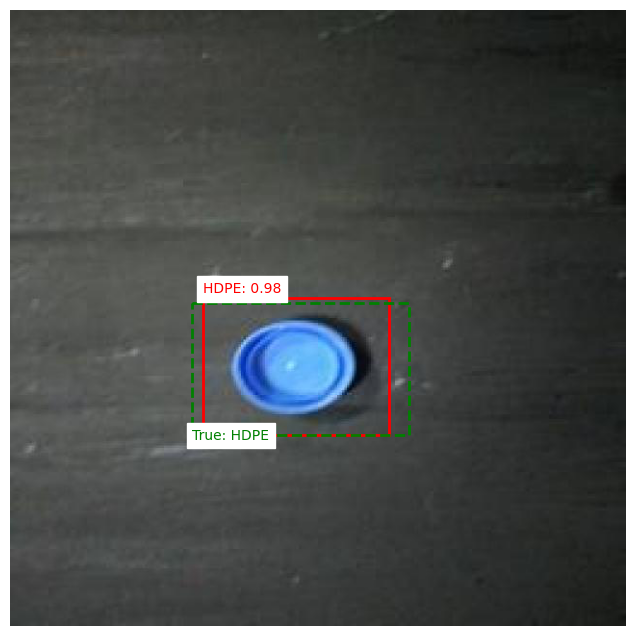

Evaluation 1 completed.


Evaluation 2 completed.


Evaluation 3 completed.


Evaluation 4 completed.


Evaluation 5 completed.


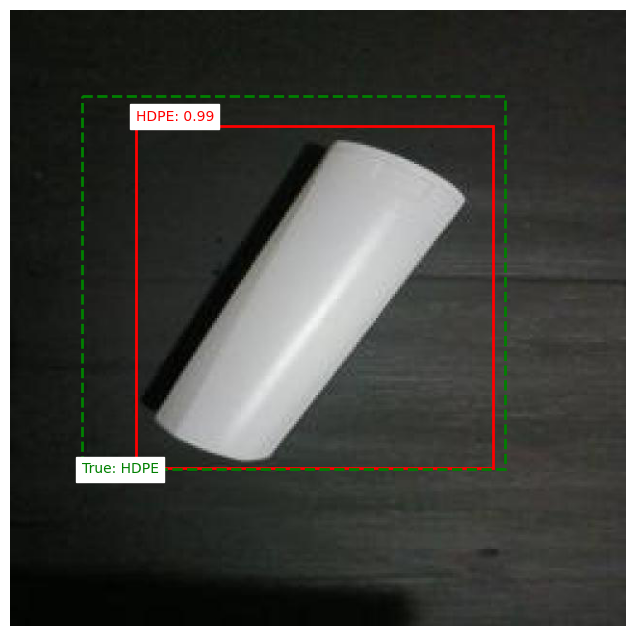

Evaluation 6 completed.


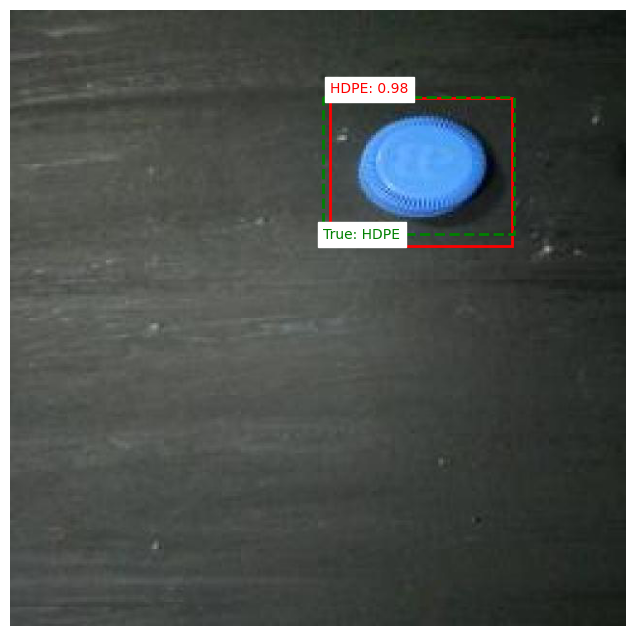

Evaluation 7 completed.


Evaluation 8 completed.


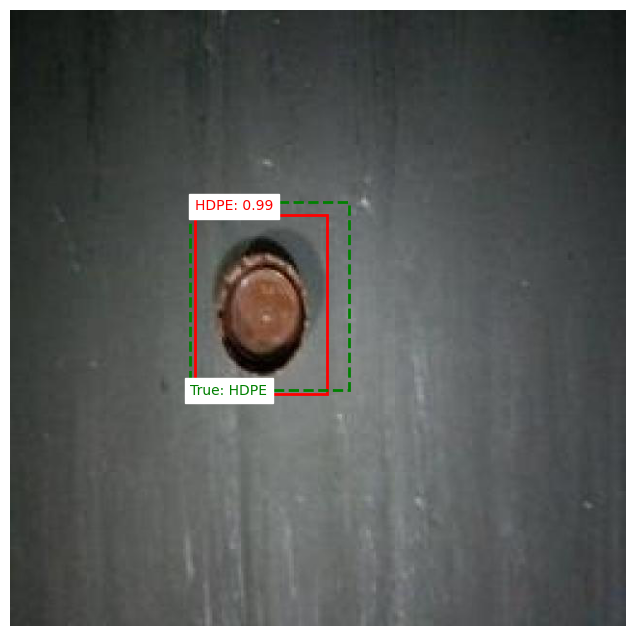

Evaluation 9 completed.


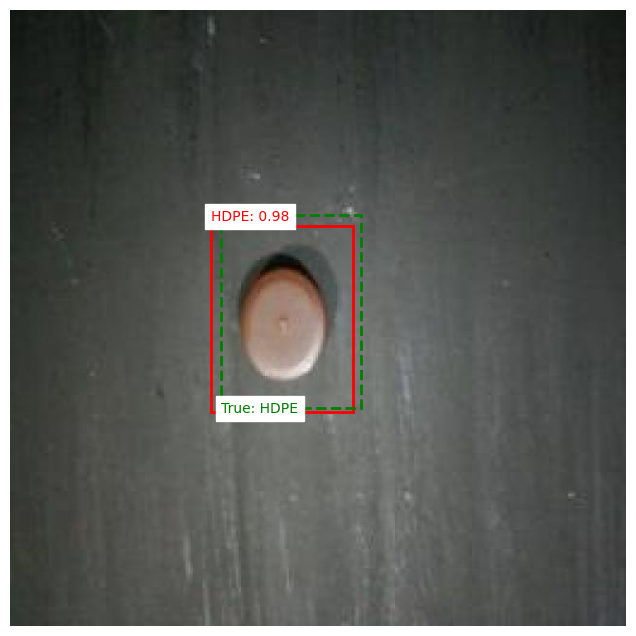

Evaluation 10 completed.


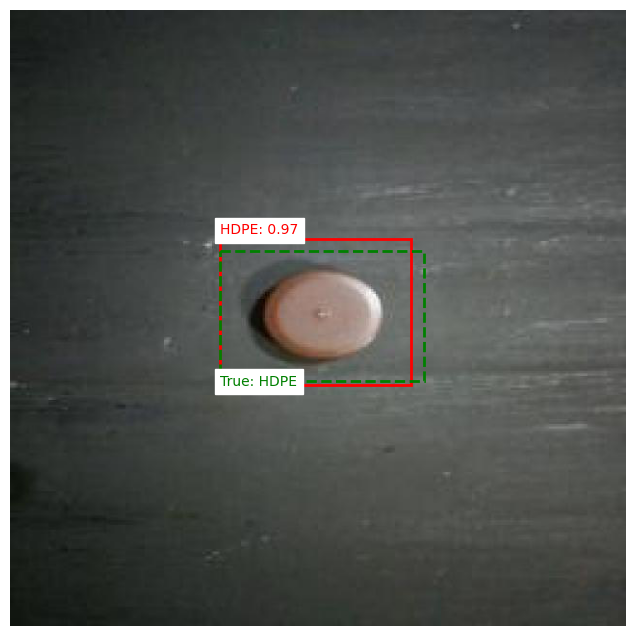

Evaluation 11 completed.


Evaluation 12 completed.


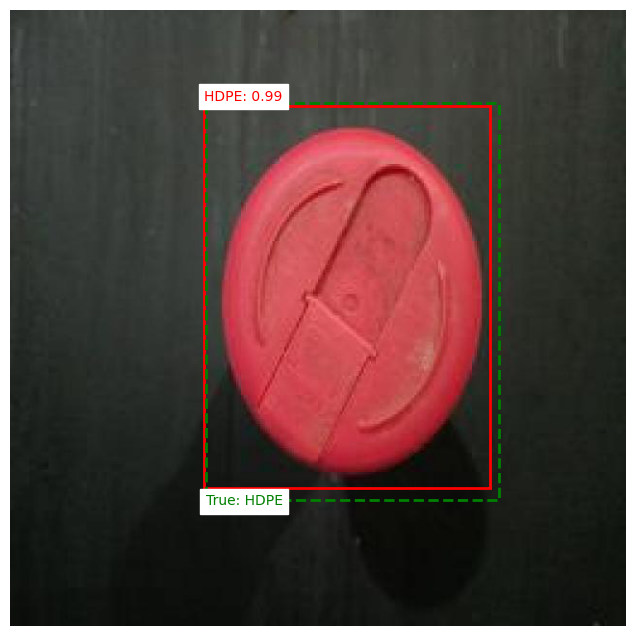

Evaluation 13 completed.


Evaluation 14 completed.


Evaluation 15 completed.


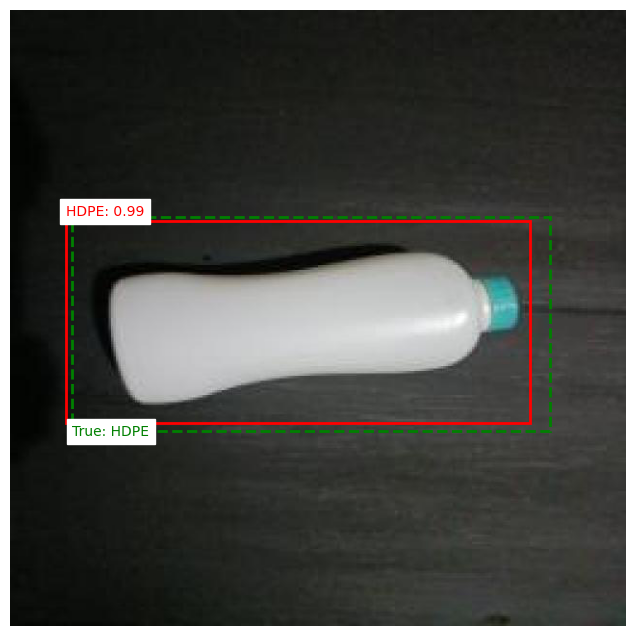

Evaluation 16 completed.


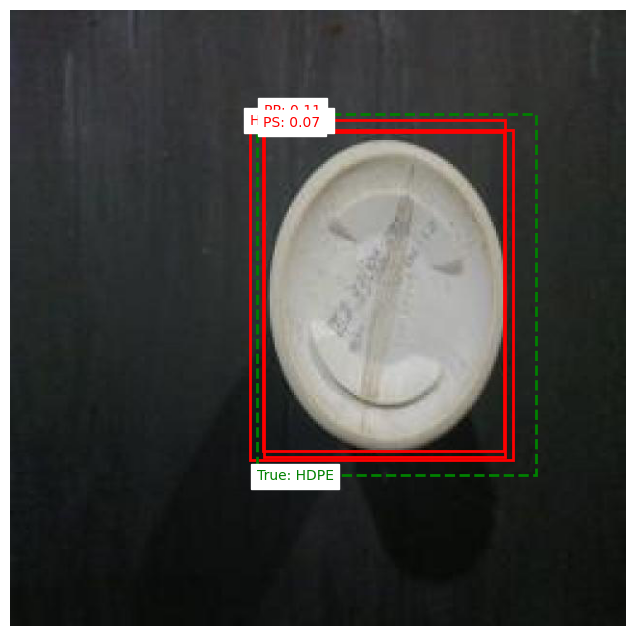

Evaluation 17 completed.


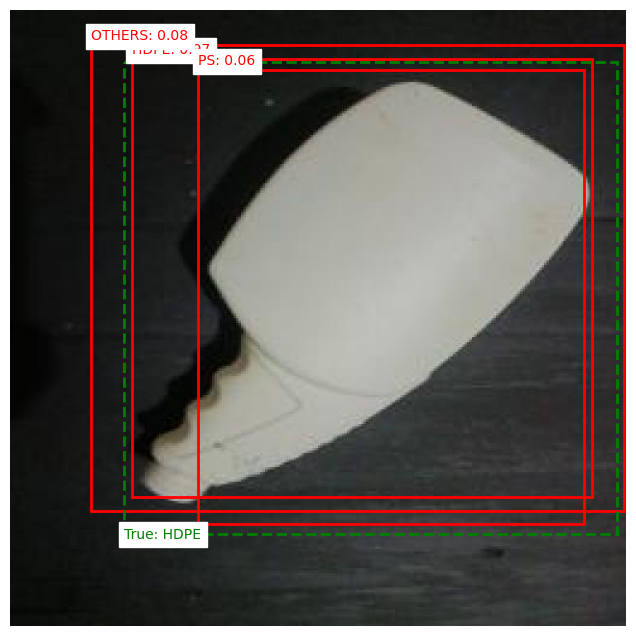

Evaluation 18 completed.


Evaluation 19 completed.


Evaluation 20 completed.


In [59]:
# Evaluate the model on the test set with different images
for i, (images, targets) in enumerate(data_loader_test):
    if i >= 20:  # Limit to 20 evaluations
        break
    images = [img.to(device) for img in images]
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

    outputs = model(images)
    # Detach tensors in outputs to avoid the RuntimeError
    outputs = [{k: v.detach() for k, v in t.items()} for t in outputs]
    # Visualize the first image in the batch
    visualize_predictions(images[0], targets[0], outputs[0], class_map)
    print(f"Evaluation {i+1} completed.")

In [69]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()
    return cm

min_num = 100

# Get true labels and predicted labels
true_labels = []
predicted_labels = []
for images, targets in data_loader_test:
    images = [img.to(device) for img in images]
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

    outputs = model(images)
    # Detach tensors in outputs to avoid the RuntimeError
    outputs = [{k: v.detach() for k, v in t.items()} for t in outputs]

    for target, output in zip(targets, outputs):
        true_labels.extend(target['labels'].cpu().numpy())
        predicted_labels.extend(output['labels'].cpu().numpy())

    # Limit to a subsection of data
    if len(true_labels) > min_num and len(predicted_labels) > min_num:
        break

true_labels = np.array(true_labels[:min_num])
predicted_labels = np.array(predicted_labels[:min_num])

cm = plot_confusion_matrix(true_labels, predicted_labels, list(class_map.keys()))